In [7]:
import random
import numpy as np
from multiprocessing import Process, Manager
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import count
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
plt.rcParams.update({'font.sans-serif':'Helvetica'})
plt.rcParams.update({'font.size': 18})

from matplotlib.backends.backend_pdf import PdfPages



In [8]:
dfff = pd.read_csv("../main_outcomes_overall.csv")

In [9]:
def getData(outcome, race):
    col = dfff[(dfff["outcome"]==outcome) & (dfff["race"]==race)]
    output= []
    for i, row in col.iterrows():
        label = ""
        if row["treatment"]=="MedianFamilyIncome":
            label = "High Income"
        if row["treatment"]=="no_college":
            label = "High Education"
        if row["treatment"]=="category_hotdogs_frac":
            label = "Low Fast Food\nRestaurant Access"
        if row["treatment"]=="lapophalfshare":
            label = "High Grocery Store Access"
        if row["treatment"]=="category_waterproofing":
            label = "Low Waterproofing Services"
        if row["treatment"]=="category_countertopinstall":
            label = "Low Countertop Installers"
        if row["treatment"]=="category_electronics":
            label = "Low Electronics Stores"

        
        if outcome == "Fresh_FV":
            output.append((label,row["effect"],row["upper_conf"],row["lower_conf"]))
        else:
            output.append((label,-row["effect"],row["lower_conf"],row["upper_conf"]))

    return output

In [10]:
getData("Fresh_FV","all") 

[('High Income', 3.2649831794439703, 0.659729547729801, 0.627033320088786),
 ('High Education', 9.17976663359652, 0.671325314269698, 0.6535517497318221),
 ('Low Fast Food\nRestaurant Access',
  5.31108996550772,
  0.564293245156371,
  0.581815686503764),
 ('High Grocery Store Access',
  3.4374976486337996,
  0.625767766261272,
  0.5984965256484499),
 ('Low Countertop Installers',
  -0.17683408793808603,
  0.547593318050525,
  0.56295932367304),
 ('Low Electronics Stores',
  -0.681365416224898,
  0.568861001541295,
  0.5389679224546711),
 ('Low Waterproofing Services',
  -1.6070759561069798,
  0.5829413103001291,
  0.532239403149853)]

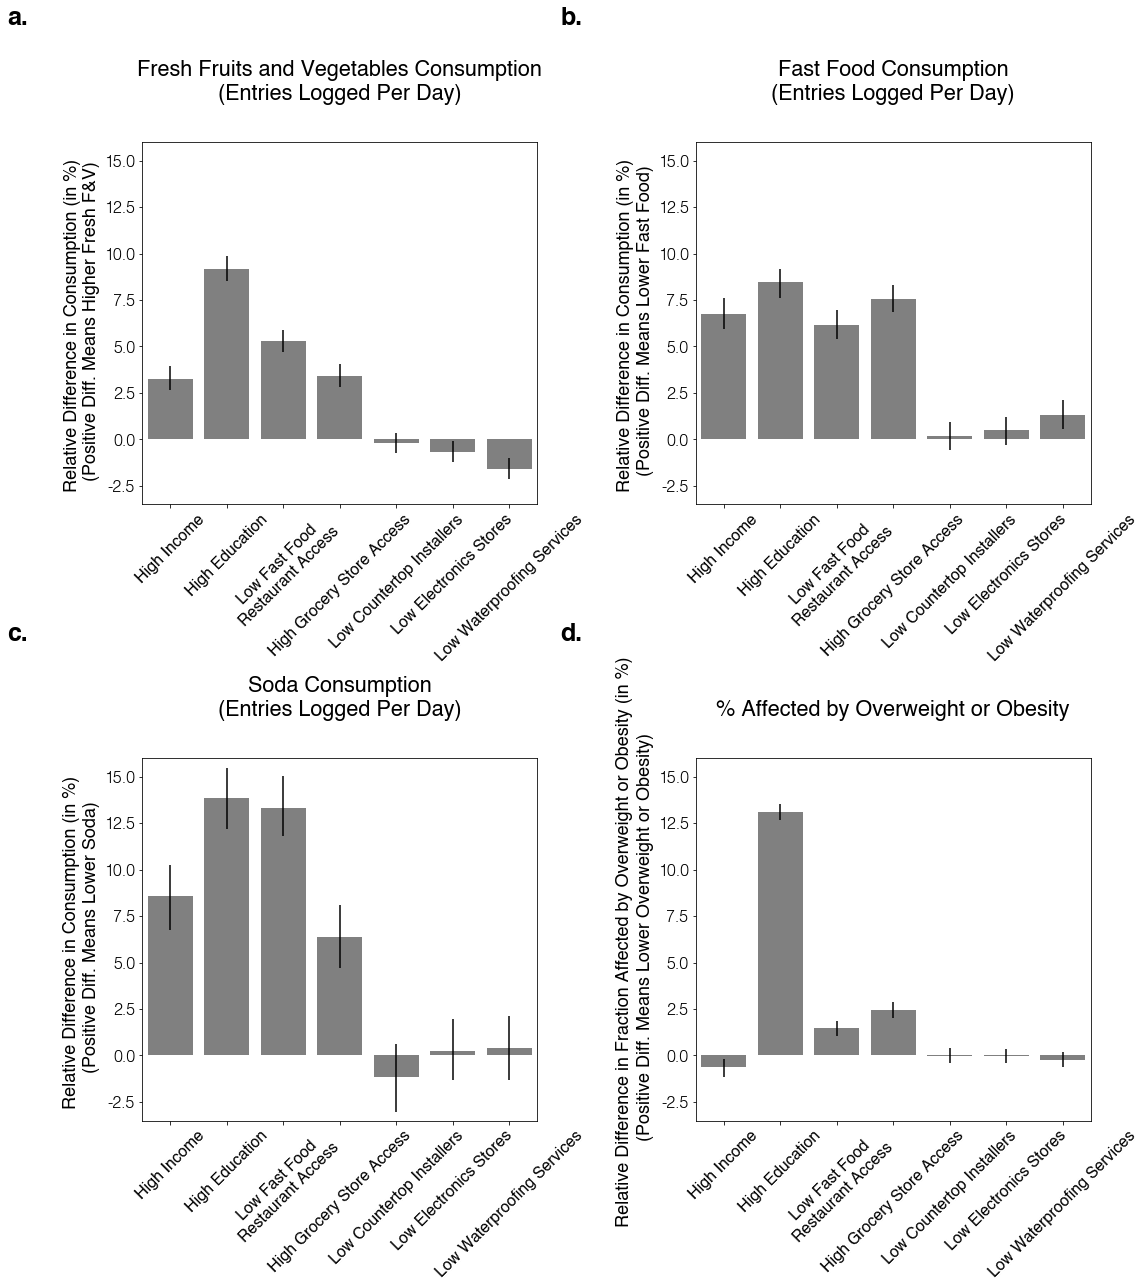

In [11]:

ticks_font = {'family':'Helveticalight','weight' : 'normal', 'size' : 16}
xticks_font = {'family':'Helvetica','weight' : 'normal', 'size' : 16}

FreshFV = getData("Fresh_FV","all")
FastFood =  getData("fast_food","all") 
Soda =  getData("soda","all")
BMI =  getData("ow","all")

noCalibration = False
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(17, 18))

fresh_fv_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Higher Fresh F&V)'
ff_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Lower Fast Food)'
soda_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Lower Soda)'
obese_label = 'Relative Difference in Fraction Affected by Overweight or Obesity (in %) \n (Positive Diff. Means Lower Overweight or Obesity)'


for graphFull in [(FreshFV,0,0,"Fresh Fruits and Vegetables Consumption\n(Entries Logged Per Day)",fresh_fv_label),(FastFood,0,1,"Fast Food Consumption\n(Entries Logged Per Day)",ff_label),(Soda,1,0,"Soda Consumption\n(Entries Logged Per Day)",soda_label),(BMI,1,1,"% Affected by Overweight or Obesity",obese_label)]:
    graph=graphFull[0]
    if noCalibration:
        graph=graphFull[0][:4]
    x = [z[0] for z in graph]
    y = [z[1] for z in graph]
    
    lower = [z[3] for z in graph]
    upper = [z[2] for z in graph]
    axs[graphFull[1],graphFull[2]].set_ylim(-3.5,16)
    axs[graphFull[1],graphFull[2]].set_ylabel(graphFull[4])
    axs[graphFull[1],graphFull[2]].set_yticklabels(axs[graphFull[1],graphFull[2]].get_yticks(), ticks_font)
    axs[graphFull[1],graphFull[2]].set_xticklabels(axs[graphFull[1],graphFull[2]].get_xticks(), xticks_font)

    g = sns.barplot(x=x, y=y, color="grey",ax=axs[graphFull[1],graphFull[2]], data=None,**{'yerr':[lower,upper]}).set_title(graphFull[3],y=1.1)

fig.subplots_adjust(hspace=.7)
fig.subplots_adjust(wspace=.4)
    
letters=['a.','b.','c.','d.']

for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)
    ax.annotate(letters.pop(0),(0, 1),xytext=(-135,135), fontname='Helveticabold',weight="bold" ,fontsize=25,xycoords='axes fraction',textcoords='offset points', ha='left', va='top')
    ax.xaxis.labelpad = 20


pp = PdfPages('../FigureOutputs/Figure4_calibration_tests.pdf')
plt.savefig(pp, format='pdf')
pp.close()
